![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 002 - Part III

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 01/04/2023 | Royi Avital | First version                                                      |
|         |            |             |                                                                    |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0002Part003.ipynb)

In [ ]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
from scipy.spatial.distance import cdist
# Machine Learning

# Computer Vision

# Statistics
from scipy.stats import multivariate_normal as MVN

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
# from IPython.display import Image, display
# from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [ ]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [ ]:
# Constants

DATA_FILE_URL   = r''
DATA_FILE_NAME  = r''


## Guidelines

 - Fill the full names of the team memebers in the `Team Members` section.
 - Answer all questions within the Jupyter Notebook.
 - Open questions are in part I of the exercise.
 - Coding based questions are in the subsequent notebooks.
 - Use MarkDown + MathJaX + Code to answer.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for question.
 - Good Luck!

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.

## Generate / Load Data

In [ ]:
# Generate / Load Data

N1    = 250
N2    = 150
N3    = 200

vMu1  = np.array([0, 0  ])
vMu2  = np.array([2, 0.5])
vMu3  = np.array([4, 1  ])

mSig1 = 0.5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mSig2 = 0.5 * np.array([[ 1.00, -1.25],
                       [-1.25,  2.00]])

mSig3 = 0.5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mX1 = MVN.rvs(mean = vMu1, cov = mSig1, size = N1)
mX2 = MVN.rvs(mean = vMu2, cov = mSig2, size = N2)
mX3 = MVN.rvs(mean = vMu3, cov = mSig3, size = N3)
mX  = np.r_[mX1, mX2, mX3]


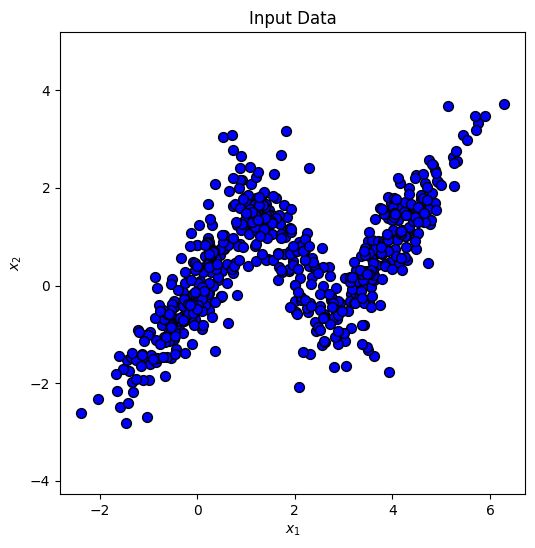

In [ ]:
# Plot Data
hF, hA = plt.subplots(figsize = (6, 6))

hA.scatter(mX[:, 0], mX[:, 1], s = 50, edgecolors = 'k', color = 'b')
hA.axis('equal')
hA.set_title('Input Data')
hA.set_xlabel('${x}_{1}$')
hA.set_ylabel('${x}_{2}$')

plt.show()

## 7. Clustering by Gaussian Mixture Model (GMM)

### 7.1. GMM Algorithm

The GMM algorithm aims to maximize the (log) likelihood objective:
$$\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}f=\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}\sum_{i=1}^{N}\log\left(\sum_{k=1}^{K}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i};\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right)$$

In this section you should implement:

1. `InitGmm()` - Given a data set and number of clusters it sets the initialization of the `GMM` algorithm:  
   - `mμ` - Should be initialized by the [`K-Means++`](https://en.wikipedia.org/wiki/K-means%2B%2B) algorithm.
   - `tΣ` - Should be initialized by diagonal matrices with the data variance on the diagonal (A scalar matrix).
   - `vW` - Should be initialized with a uniform distribution.  
2. `CalcGmmObj()` - Given a data set and set of parameters it calculate the value of the GMM objective function.
3. `GMM()` - Given a data set and initialization applies the GMM algorithm.  
The stopping criteria should be number of iterations or minimal improvement in the objective function.

* <font color='brown'>(**#**)</font> Implementation should be efficient (Memory and operations). Total run time expected to be **less than 60 seconds**.
* <font color='brown'>(**#**)</font> You may use the `scipy.stats.multivariate_normal` class.



In [ ]:
def InitKMeans(mX: np.ndarray, K: int, initMethod: int = 0, seedNum: int = 123) -> np.ndarray:
    np.random.seed(seedNum)
    centroids = np.expand_dims(mX[np.random.randint(mX.shape[0])],axis=0)
    for i in range(K-1):
        distances = cdist(centroids, mX)
        centroid_index =np.argmax(distances.min(axis=0))
        centroids = np.vstack((centroids, mX[centroid_index]))
    return centroids

In [ ]:
#===========================Fill This===========================#
def InitGmm(mX: np.ndarray, K: int, seedNum: int = 123) -> np.ndarray:
    '''
    GMM algorithm initialization.
    Args:
        mX          - Input data with shape N x d.
        K           - Number of clusters.
        seedNum     - Seed number used.
    Output:
        mμ          - The initial mean vectors with shape K x d.
        tΣ          - The initial covariance matrices with shape (d x d x K).
        vW          - The initial weights of the GMM with shape K.
    Remarks:
        - Given the same parameters, including the `seedNum` the algorithm must be reproducible.
        - mμ Should be initialized by the K-Means++ algorithm.
    '''
    d=mX.shape[1]
    mμ = InitKMeans(mX,K,seedNum)
    a = np.eye(d) * mX.var()
    tΣ =  np.zeros((d,d,K)) + np.expand_dims(a,axis=2)
    vW = np.ones(K) * 1/K
    return mμ, tΣ, vW
#===============================================================#

In [ ]:
#===========================Fill This===========================#
def CalcGmmObj(mX: np.ndarray, mμ: np.ndarray, tΣ: np.ndarray, vW: np.ndarray) -> float:
    '''
    GMM algorithm objective function.
    Args:
        mX          - The data with shape N x d.
        mμ          - The initial mean vectors with shape K x d.
        tΣ          - The initial covariance matrices with shape (d x d x K).
        vW          - The initial weights of the GMM with shape K.
    Output:
        objVal      - The value of the objective function of the GMM.
    Remarks:
        - A
    '''
    GmmObj = np.zeros(mX.shape[0])
    for i, weight in enumerate(vW):
        GmmObj = GmmObj + MVN.pdf(mX,mμ[i], tΣ[...,i]) * weight
    return -np.log(GmmObj).sum()
#===============================================================#

In [ ]:
#===========================Fill This===========================#
def GMM(mX: np.ndarray, mμ: np.ndarray, tΣ: np.ndarray, vW: np.ndarray, numIter: int = 1000, stopThr: float = 1e-5) -> np.ndarray:
    '''
    GMM algorithm.
    Args:p
        mX          - Input data with shape N x d.
        mμ          - The initial mean vectors with shape K x d.
        tΣ          - The initial covariance matrices with shape (d x d x K).
        vW          - The initial weights of the GMM with shape K.
        numIter     - Number of iterations.
        stopThr     - Stopping threshold.
    Output:
        mμ          - The final mean vectors with shape K x d.
        tΣ          - The final covariance matrices with shape (d x d x K).
        vW          - The final weights of the GMM with shape K.
        vL          - The labels (0, 1, .., K - 1) per sample with shape (N, )
        lO          - The objective function value per iterations (List).
    Remarks:
        - The maximum number of iterations must be `numIter`.
        - If the objective value of the algorithm doesn't improve by at least `stopThr` the iterations should stop.
    '''
    last_Obj = 0
    lO = []
    for i in range(numIter):
        Obj = CalcGmmObj(mX, mμ, tΣ, vW)
        lO.append(Obj)
        x = np.array([MVN.pdf(mX, mμ[w], tΣ[...,w])* weight for w, weight in enumerate(vW)])
        if abs(Obj-last_Obj) < stopThr:
            vL = x.argmax(axis=0)
            break
        last_Obj = Obj
        p_x = (x/ x.sum(axis=0))
        N_k = p_x.sum(axis=1)
        vW = N_k / p_x.shape[1]
        mμ = (p_x @ mX) / N_k[:,None]
        tΣ = np.array([(p_x[i][:,None] * (mX - mμ[i])).T @ (mX - mμ[i]) /n for i, n in enumerate(N_k)]).T

    return mμ, tΣ, vW, vL, lO 
#===============================================================#

### 7.2. Clustering the Data Set

In this section we'll compare the output of the GMM to the K-Means on the data set.
The tasks are:

1. Create a file called `CourseAuxFun.py`.  
   Copy the functions of the functions related to the GMM and K-Means into it.
2. Import the functions using `from CourseAuxFun.py import *`.
3. Using **the same** initialization (`mC` and `mμ`), compare the results of the the K-Means and GMM algorithm.
4. Plot the objective function of the GMM as a function of the iteration.
5. Write a short answer why the results are different.

In [ ]:
from CourseAuxFun import *

In [ ]:
#===========================Fill This===========================#
# 1. Set the clustering parameters.
# 2. Apply the GMM algorithm.

mμ, tΣ, vW = InitGmm(mX,3)
mμ, tΣ, vW, vL, lO =  GMM(mX, mμ, tΣ, vW)
mC, vL_kmeans, lO_kmeans = KMeans(mX, mμ, numIter=100)
#===============================================================#


In [ ]:

def plot_results(results ,mX):
    hF, hA = plt.subplots(2,2, figsize = (15, 12))
    for i, (model, result) in enumerate(results.items()):
        hA[i,0].scatter(mX[:, 0], mX[:, 1], s = 50, edgecolors = 'k', c = result[0])
        hA[i,0].set_xlabel('${x}_{1}$',size=14)
        hA[i,0].set_ylabel('${x}_{2}$',size=14)
        hA[i,0].set_title(model,size=16, fontweight="bold")
        # hA[i,0].axis('equal')
        hA[i,1].plot(range(len(result[1])),result[1])
        hA[i,1].set_xlabel('Iterations',size=14)
        hA[i,1].set_ylabel('Objective Function',size=14)
        hA[i,1].set_title(f'{model} - Objective Function', size=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

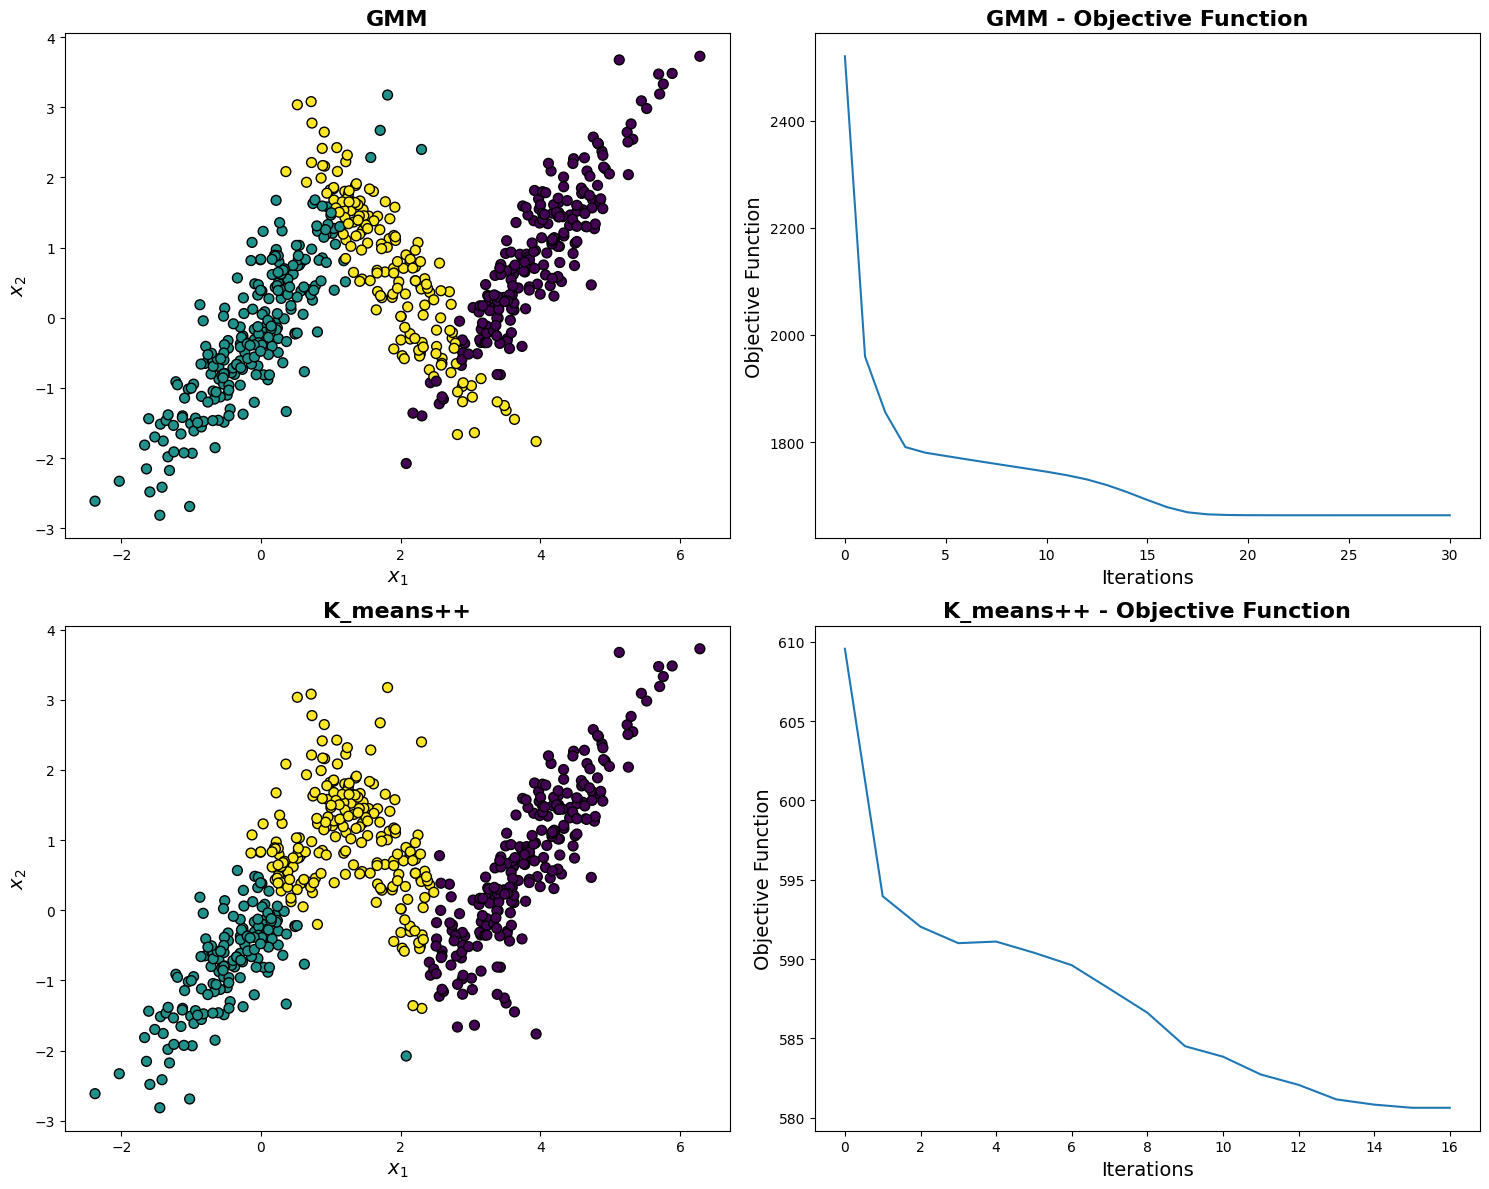

In [ ]:
#===========================Fill This===========================#
# 1. Plot the clustered data.
# 2. Plot the objective function as a function of the iterations.
# !! You may plot in a single figure (Sub Plots).
results = {"GMM": [vL, lO], "K_means++": [vL_kmeans, lO_kmeans]}
plot_results(results, mX)
#===============================================================#

**Explaining the results:**

As Kmeans doesn't preform well in clusters which have different scale or density, and which are of different sizes. It associates a point to cluster base on distance metric and result in more condense more spheric-like clusters, as can be seen in the result. GMM on the other hand, associates point to a cluster (distribution) base on probability and is more flexible towards different cluster scale and sizes, thus it preforms better on the given data.

### 7.3. GMM vs. K-Means

K-Means is known to be a private case of GMM.  
The following questions try to understand the connection between the 2.

 1. How does the parameters of the GMM algorithm should be set to have the K-Means?
 2. How should the data in (7.2) be altered in order to K-Means perform on it like the GMM?  
    Assume you know exactly how it was generated.

You may use coding to verify and show the results.

### 7.3. Solution
1. In GMM we can use Mahalanobis distance to associate a point to a multivariate probability distribution.

$d_{M}^{2}=(\boldsymbol{\boldsymbol{x}}_{i}-\boldsymbol{\boldsymbol{\mu}}_{k})\Sigma^{-1}_{k}(\boldsymbol{\boldsymbol{x}}_{i}-\boldsymbol{\boldsymbol{\mu}}_{k})^{T}$

Additionally, K-means tends to form equal size clusters and works well on spherical clusters.
Thus, if we force the weights to be equal and set all the covariance matrices to be the same scalar matrix, GMM will behave the same as K-means.

2.  K-means works well on the clusters which are spherical, associates each point to a single cluster and may results in equal size clusters. Thus if we alter to data to have roughly equaly sized clusters with the same scale i.e. scalar matrices as covariance matrices, the results will be similar, as the following example demonstrates: 

In [ ]:
N1    = 200
N2    = 200
N3    = 200

vMu1  = np.array([0, 0 ])
vMu2  = np.array([3, 3])
vMu3  = np.array([6, 6])

mSig1 = 0.5 * np.array([[1.00, 0],
                       [0, 1.00]])

mSig2 = 0.5 * np.array([[ 1.00, 0],
                       [0,  1.00]])

mSig3 = 0.5 * np.array([[1.00, 0],
                       [0, 1.00]])


mX1 = MVN.rvs(mean = vMu1, cov = mSig1, size = N1)
mX2 = MVN.rvs(mean = vMu2, cov = mSig2, size = N2)
mX3 = MVN.rvs(mean = vMu3, cov = mSig3, size = N3)
mX_2  = np.r_[mX1, mX2, mX3]

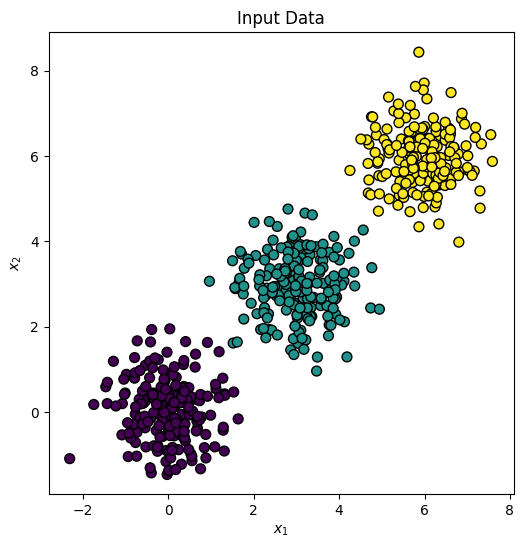

In [ ]:
# Plot Data
labels = np.r_[np.full(mX1.shape[0], fill_value=1),np.full(mX2.shape[0], fill_value=2),np.full(mX3.shape[0], fill_value=3)]
hF, hA = plt.subplots(figsize = (6, 6))
color = ["b","r", "g"]
hA.scatter(mX_2[:, 0], mX_2[:, 1], s = 50, edgecolors = 'k', c=labels)
hA.axis('equal')
hA.set_title('Input Data')
hA.set_xlabel('${x}_{1}$')
hA.set_ylabel('${x}_{2}$')

plt.show()

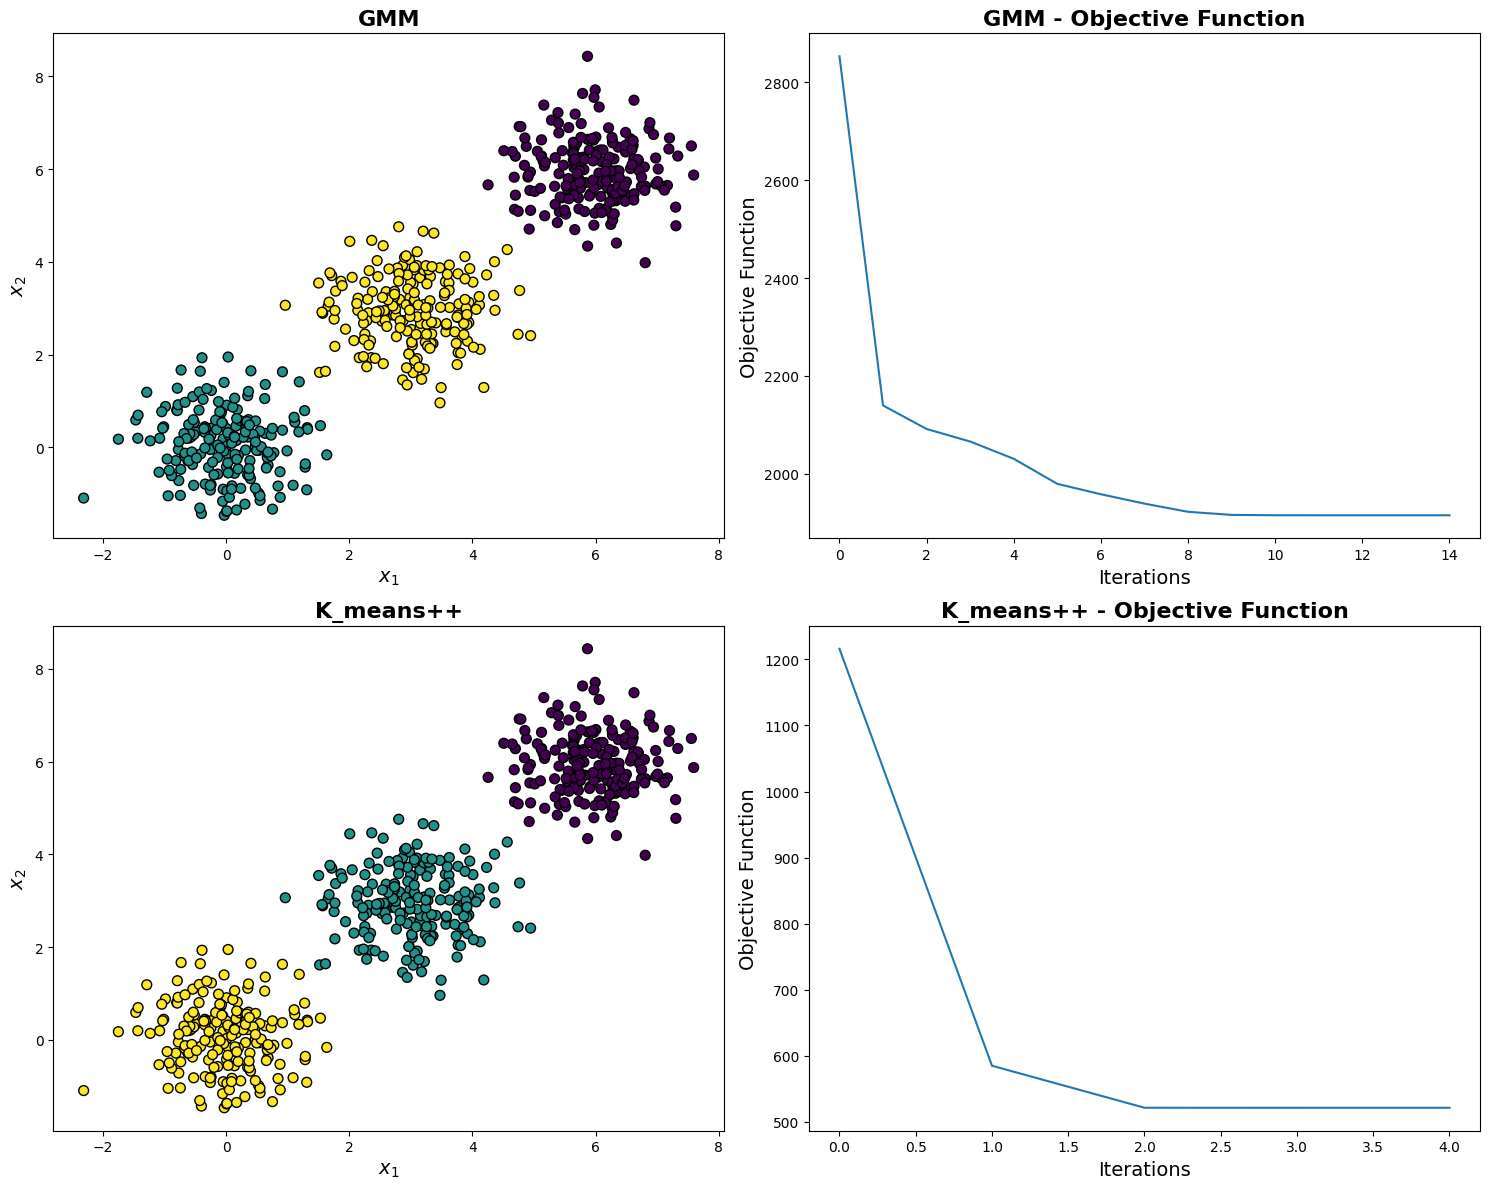

In [ ]:
mμ, tΣ, vW = InitGmm(mX_2,3)
mμ, tΣ, vW, vL_test, lO_test =  GMM(mX_2, mμ, tΣ, vW)
mμ= InitKMeans(mX_2,3,0,seedNum)
mC, vL_kmeans_test, lO_kmeans_test = KMeans(mX_2, mμ, numIter=100)
results_test = {"GMM": [vL_test, lO_test], "K_means++": [vL_kmeans_test, lO_kmeans_test]}
plot_results(results_test, mX_2)